dFBA 

Es sind folgende Imports zur Nutzung des Packages notwendig:

In [1]:
from utils import load_model, set_objective
from dynamic_fba import DynamicFBA
print("Imports finished.")

Imports finished.


Could not find GLIMDA.


Zuerst wird das Model und die Objective Function definiert.

In [3]:
model_path = r"C:\Users\User\Documents\GitHub\dyn-pam\Models\e_coli_core.xml"
model = load_model(model_path)
print("Model loaded.")

biomass_reaction_core = "BIOMASS_Ecoli_core_w_GAM"
objective_function_id = biomass_reaction_core
set_objective(model, objective_function_id)
print("Objective set.")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-16
Model loaded.
Objective set.


Als nächstes werden die Startkonzentrationen von bekannten Metaboliten und bekannte MM-Parameter angegeben.

In [4]:
start_concentrations = {'EX_glc__D_e': 10.0,
                        'EX_ac_e': 2.0,
                        #'EX_etoh_e': 1.0,
                        #'EX_lac__D_e': 5.0,
                        biomass_reaction_core: 1.0}
print("Concentrations given.")

michaelis_menten_parameters = {'EX_glc__D_e': {'KM': 0.015, 'Vmax': 10.0},
                               'EX_ac_e': {'KM': 0.02, 'Vmax': 8.0},
                               #'EX_etoh_e': {'KM': 0.017, 'Vmax': 9.0},
                               #'EX_lac__D_e': {'KM': 0.015, 'Vmax': 10.0}
                               }
print("MM parameters given.")

Concentrations given.
MM parameters given.


Das DynamicFBA-Objekt wird initialisiert.

In [5]:
dynamic_fba = DynamicFBA(model,
                         michaelis_menten_parameters,
                         objective_function_id)

print("DynamicFBA initialisiert.")

DynamicFBA initialisiert.


Definiere anschließend die Parameter der Simulation und führe sie aus.

Final Run Statistics: --- 


Solver options:

 Solver            : ExplicitEuler
 Solver type       : fixed step size
 Step size         : 0.01

Simulation interval    : 0.0 - 2.0 seconds.
Elapsed simulation time: 0.832023199996911 seconds.
+--------+-----------+--------------+------------+------------+-------------+------------+------------+------------+---------------+---------------+---------------+----------+------------+---------------+---------------+------------+-----------+-----------+------------+-------------+----------------------------+
|   Time |   EX_ac_e |   EX_acald_e |   EX_akg_e |   EX_co2_e |   EX_etoh_e |   EX_for_e |   EX_fru_e |   EX_fum_e |   EX_glc__D_e |   EX_gln__L_e |   EX_glu__L_e |   EX_h_e |   EX_h2o_e |   EX_lac__D_e |   EX_mal__L_e |   EX_nh4_e |   EX_o2_e |   EX_pi_e |   EX_pyr_e |   EX_succ_e |   BIOMASS_Ecoli_core_w_GAM |
+========+===========+==============+============+============+=============+============+============+============+===============

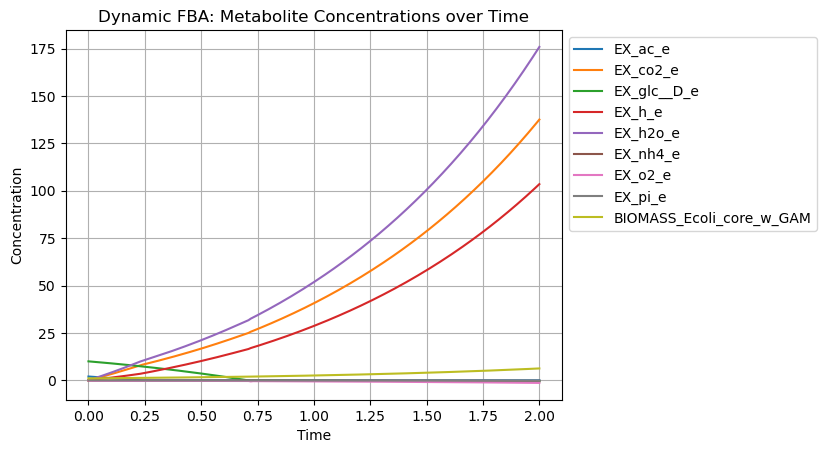

In [6]:
t0 = 0.0  # Startzeit
tf = 2.0  # Endzeit
t, y = dynamic_fba.simulate(t0, tf, start_concentrations,
                            data_list=True, plot=True)

Zum Testen des Packages mit den PAMs wird der Model Path angepasst.

In [7]:
model_path_PAM_core = r"C:\Users\User\Documents\GitHub\dyn-pam\Models\iML1515_core_PAM.pkl"
pam_model = load_model(model_path)
print("Model loaded.")

Model loaded.


Anschließend wird der restliche Code wie oben ausgeführt.

Objective set.
DynamicFBA initialisiert.
Final Run Statistics: --- 


Solver options:

 Solver            : ExplicitEuler
 Solver type       : fixed step size
 Step size         : 0.01

Simulation interval    : 0.0 - 2.0 seconds.
Elapsed simulation time: 0.8159463999327272 seconds.
+--------+-----------+--------------+------------+------------+-------------+------------+------------+------------+---------------+---------------+---------------+----------+------------+---------------+---------------+------------+-----------+-----------+------------+-------------+----------------------------+
|   Time |   EX_ac_e |   EX_acald_e |   EX_akg_e |   EX_co2_e |   EX_etoh_e |   EX_for_e |   EX_fru_e |   EX_fum_e |   EX_glc__D_e |   EX_gln__L_e |   EX_glu__L_e |   EX_h_e |   EX_h2o_e |   EX_lac__D_e |   EX_mal__L_e |   EX_nh4_e |   EX_o2_e |   EX_pi_e |   EX_pyr_e |   EX_succ_e |   BIOMASS_Ecoli_core_w_GAM |
+========+===========+==============+============+============+=============+============

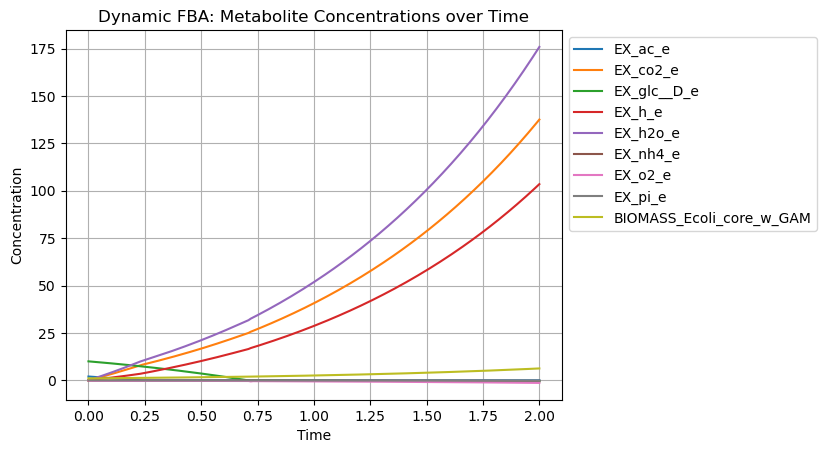

In [8]:
set_objective(pam_model, objective_function_id)
print("Objective set.")

dynamic_fba = DynamicFBA(pam_model,
                         michaelis_menten_parameters,
                         objective_function_id)

print("DynamicFBA initialisiert.")

t0 = 0.0  # Startzeit
tf = 2.0  # Endzeit
t, y = dynamic_fba.simulate(t0, tf, start_concentrations,
                            data_list=True, plot=True)